## Used Car Price Prediction

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

### Exploratory Data Analysis

In [53]:
## Dataset Exploration

db = pd.read_csv('used_cars.csv')

print(" -------- Info -------- ")
print(db.info())
print(" -------- Describe -------- ")
print(db.describe()) ## Statistics for int columns
print(" -------- Null values Column -------- ")
print(db.isnull().sum())
print(" -------- Unique Values Column -------- ")
print(db.nunique())
print(" -------- Duplicate Rows -------- ")
print(db.duplicated().sum())


 -------- Info -------- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB
None
 -------- Describe -------- 
        model_year
count  4009.000000
mean   2015.515590
std       6.104816
min    1974.000000
25%    2012.000000
50%    2017.000000
75%    2020.000000
max    2024.000000
 -------- Null values 

In [54]:
# Remove currency symbols and commas
db['price'] = db['price'].str.replace('$', '')
db['price'] = db['price'].str.replace(',', '')

# Convert to float
db['price'] = pd.to_numeric(db['price'], errors='coerce')

# Remove mi. and commas
db['milage'] = db['milage'].str.replace('mi.', '')
db['milage'] = db['milage'].str.replace(',', '')

# Convert to float
db['milage'] = pd.to_numeric(db['milage'], errors='coerce')

## Handle Missing values
categorical_cols = ['fuel_type', 'accident', 'clean_title']

for col in categorical_cols:
    db[col].fillna(db[col].mode()[0], inplace=True)


print(" -------- Info -------- ")
print(db.info())
print(" -------- Describe -------- ")
print(db.describe()) ## Statistics for int columns
print(" -------- Null values Column -------- ")
print(db.isnull().sum())
print(" -------- Unique Values Column -------- ")
print(db.nunique())
print(" -------- Duplicate Rows -------- ")
print(db.duplicated().sum())

 -------- Info -------- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   int64 
 4   fuel_type     4009 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      4009 non-null   object
 10  clean_title   4009 non-null   object
 11  price         4009 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 376.0+ KB
None
 -------- Describe -------- 
        model_year         milage         price
count  4009.000000    4009.000000  4.009000e+03
mean   2015.515590   64717.551010  4.455319e+04
std       6.104816   52296.599459  7.871064e+04
mi

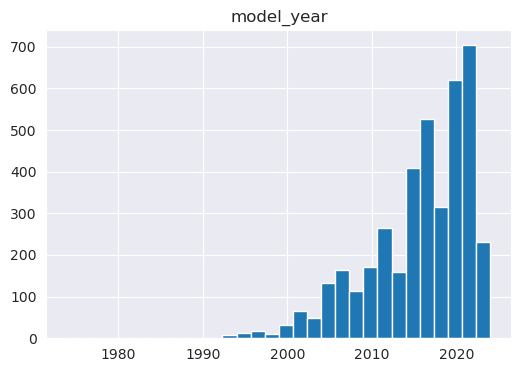

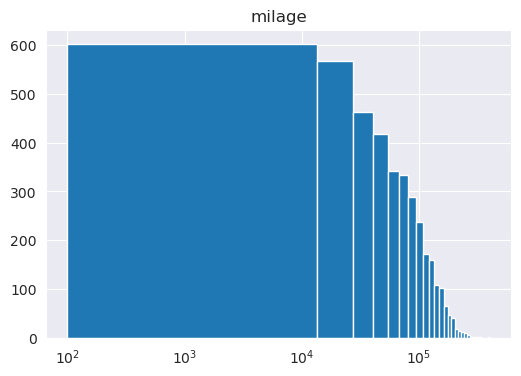

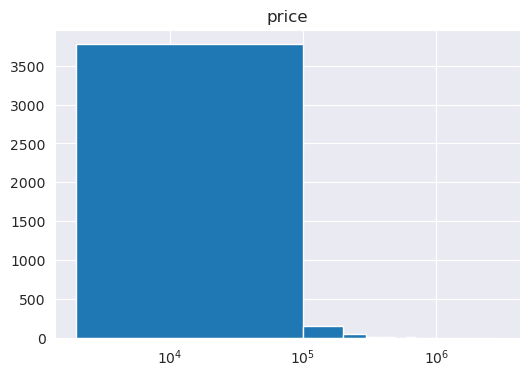

In [55]:
## Plot histograms for numerical values
numeric_cols = ['model_year', 'milage', 'price']

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    db[col].hist(bins=30)

    if col in ['price', 'milage']:
        plt.xscale('log')
    plt.title(f'{col}')

    plt.show()


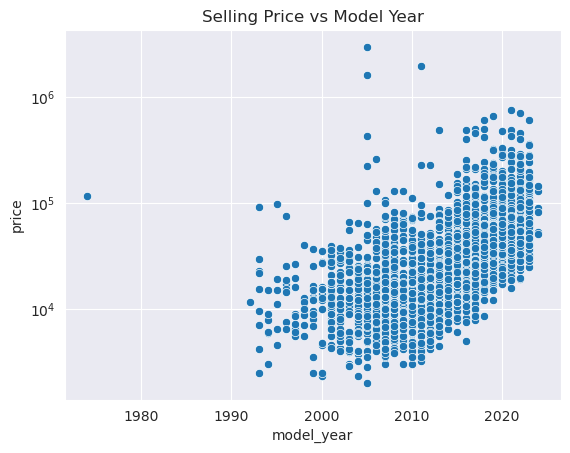

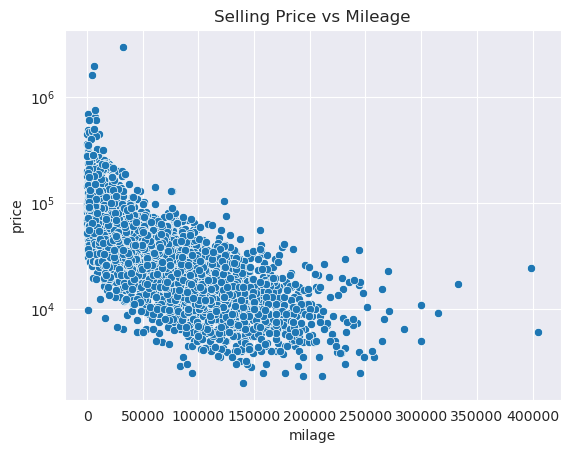

In [56]:
## Scatter plots : Selling prices vs other features

sns.scatterplot(data=db, x='model_year', y='price')
plt.yscale('log')
plt.title('Selling Price vs Model Year')
plt.show()

sns.scatterplot(data=db, x='milage', y='price')
plt.yscale('log')
plt.title('Selling Price vs Mileage')
plt.show()

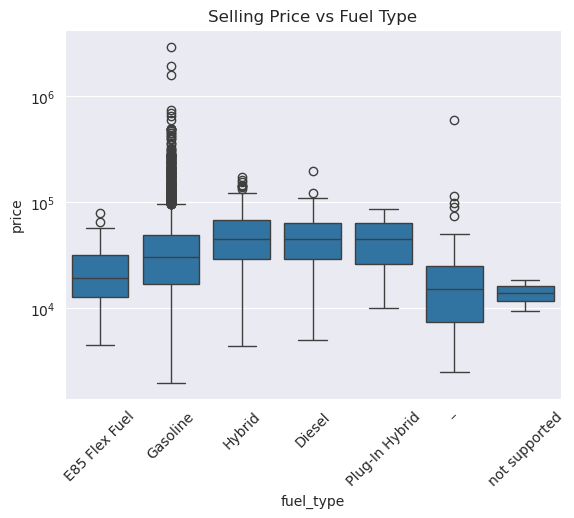

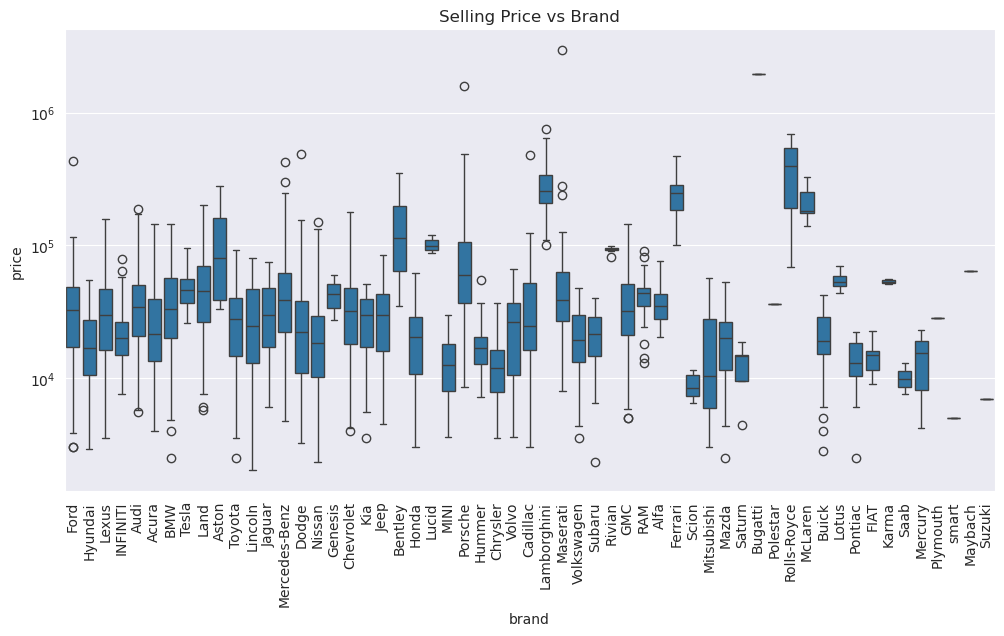

In [57]:
# Boxplots: Selling prices vs other features
sns.boxplot(data=db, x='fuel_type', y='price')
plt.yscale('log')
plt.title('Selling Price vs Fuel Type')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,6))
plt.yscale('log')
sns.boxplot(data=db, x='brand', y='price')
plt.title('Selling Price vs Brand')
plt.xticks(rotation=90)
plt.show()


## Data Preprocessing


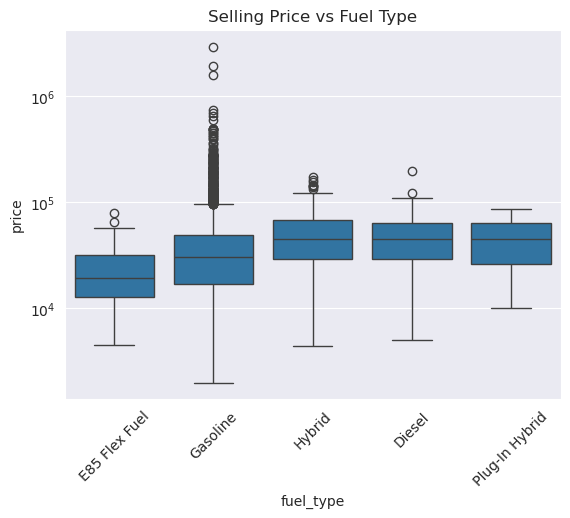

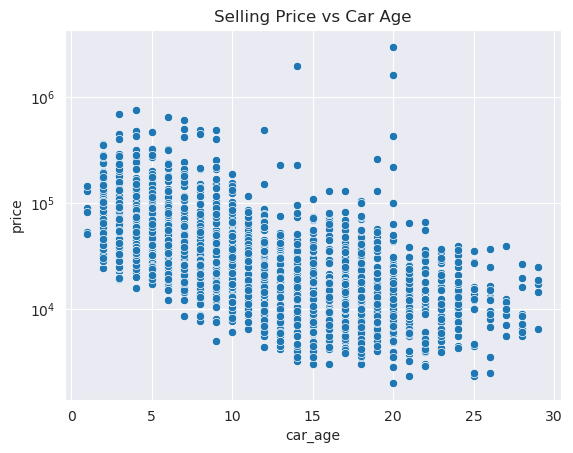

In [58]:
## add car_age and drop model_year
current_year = datetime.now().year
db['car_age'] = current_year - db['model_year']
db.drop('model_year', axis=1, inplace=True)

## drop -  and not supported rows
db = db[~db['fuel_type'].isin(['–', 'not supported'])]


# Boxplots: Selling prices vs other features
sns.boxplot(data=db, x='fuel_type', y='price')
plt.yscale('log')
plt.title('Selling Price vs Fuel Type')
plt.xticks(rotation=45)
plt.show()

sns.scatterplot(data=db, x='car_age', y='price')
plt.yscale('log')
plt.title('Selling Price vs Car Age')
plt.show()

In [68]:
# Apply One-Hot Encoding with pandas get_dummies

categorical_cols = db.select_dtypes(exclude=['int64','float64','bool']).columns

db = pd.get_dummies(db, columns=categorical_cols, drop_first=True)

## each value gets its column for categorical vars


In [69]:
## Normalize and standardize numeric variables
numeric_cols = ['milage', 'price', 'car_age']

scaler = StandardScaler()
db[numeric_cols] = scaler.fit_transform(db[numeric_cols])

print(db.head())

     milage     price   car_age  brand_Alfa  brand_Aston  brand_Audi  \
0 -0.256439 -0.437308  0.457540       False        False       False   
1 -0.568302 -0.084789 -0.912919       False        False       False   
2 -0.805584  0.126342 -1.084226       False        False       False   
3  0.470562 -0.371143  0.114926       False        False       False   
4 -1.046070 -0.123037 -0.912919       False        False        True   

   brand_BMW  brand_Bentley  brand_Bugatti  brand_Buick  ...  \
0      False          False          False        False  ...   
1      False          False          False        False  ...   
2      False          False          False        False  ...   
3      False          False          False        False  ...   
4      False          False          False        False  ...   

   engine_HEMI 5.7L V-8 variable valve control, regular unleaded, engine w  \
0                                              False                         
1                         

## Data Splitting


In [74]:
## Separate evidence and label

y = db['price']

X = db.drop('price', axis=1)


In [78]:
## Splitting into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Model Training and Evaluation

In [79]:
## Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'SVM': SVR(kernel='rbf'),
    'k-NN': KNeighborsRegressor(n_neighbors=5)
}



Linear Regression:
  MAE: 830266140110.9393
  MSE: 8927732762046784975405056.0000
  RMSE: 2987931184289.0200
  R2: -25673080153565231562358784.0000


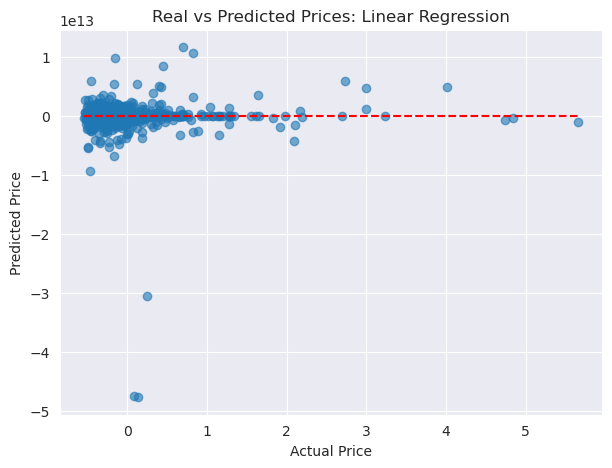

Decision Tree:
  MAE: 0.1864
  MSE: 0.1916
  RMSE: 0.4377
  R2: 0.4490


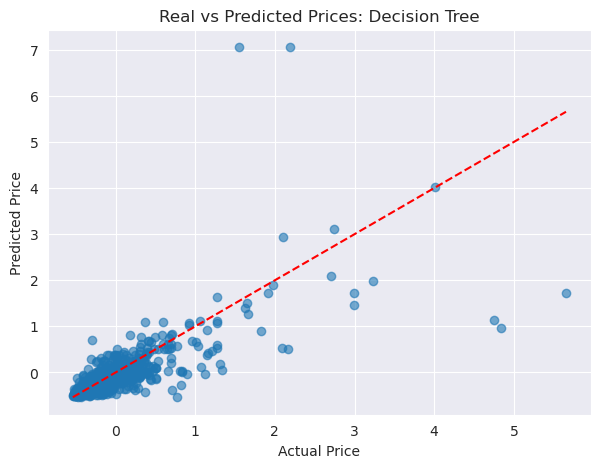

Random Forest:
  MAE: 0.1502
  MSE: 0.1223
  RMSE: 0.3497
  R2: 0.6484


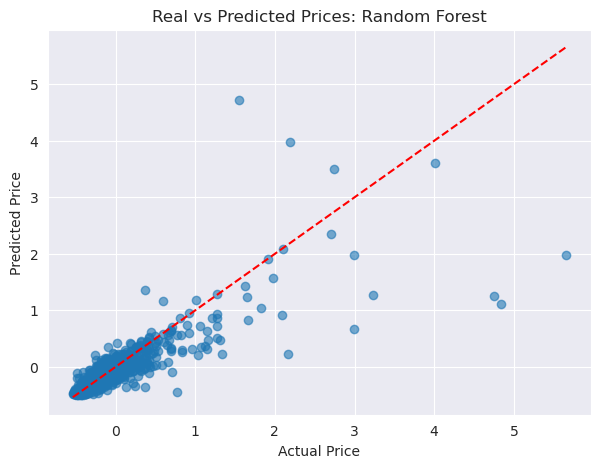

Gradient Boosting:
  MAE: 0.2028
  MSE: 0.1519
  RMSE: 0.3897
  R2: 0.5633


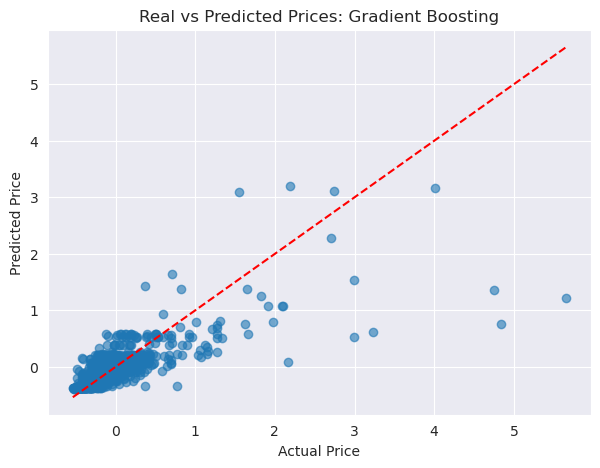

SVM:
  MAE: 0.1563
  MSE: 0.1292
  RMSE: 0.3594
  R2: 0.6285


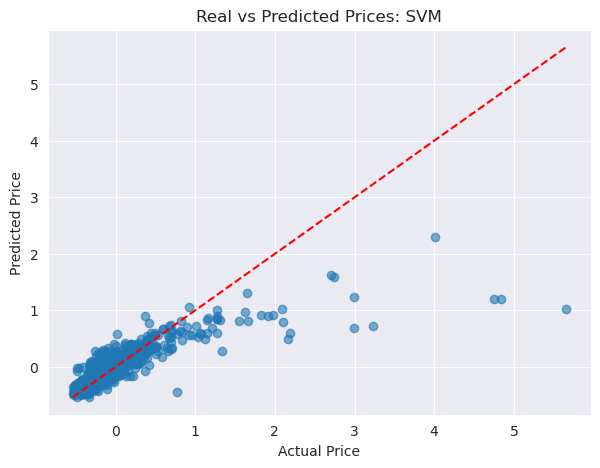

k-NN:
  MAE: 0.1768
  MSE: 0.1562
  RMSE: 0.3952
  R2: 0.5509


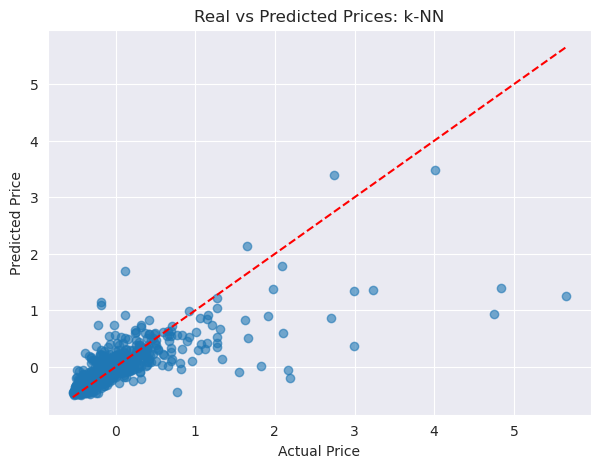

In [81]:
## Model training and evaluation
results = {}

for name,model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    ## Evaluation Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2,'y_pred': y_pred}

for model_name, metrics in results.items():
    print(f"{model_name}:")
    for metric_name, value in metrics.items():
        if metric_name == 'y_pred':
            plt.figure(figsize=(7,5))
            plt.scatter(y_test, value, alpha=0.6)
            plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
            plt.xlabel('Actual Price')
            plt.ylabel('Predicted Price')
            plt.title(f'Real vs Predicted Prices: {model_name}')
            plt.show()
        else :
            print(f"  {metric_name}: {value:.4f}")